# Trabalho No. 3

- Aluno: Guilherme Lisboa de Oliveira (GRR20170414)

```{admonition} Questões

Questões: 5 e 9 na Seção XI.8 Exercícios em http://leg.ufpr.br/~lucambio/MSM/MSM11.html#MSMXI.9

Aplicar análise de cluster aos dados do exercício 10 na Seção XI.8 em http://leg.ufpr.br/~lucambio/MSM/MSM11.html#MSMXI.9

```

## Seção XI.8

### Questão 5

Este conjunto de dados fornece dados sobre registros atléticos de 55 países.
Observe que os registros dos 100m, 200m, 400m, 800m são em segundos e 1500m, 5000m, 10000m e Marathon em minutos. Aplique componentes principais normalizadas. Interprete seus resultados.

Importando os dados, temos:

In [2]:
import pandas as pd

ESPAÇO = ' '

registros_atléticos = pd.read_table('./dados/AthleticRecords.txt', sep=ESPAÇO)
registros_atléticos.head()

,Country,100m,200m,400m,800m,1500m,5000m,10000m,Marathon
0,Argentina,10.39,20.81,46.84,1.81,3.70,14.04,29.36,137.71
1,Australia,10.31,20.06,44.84,1.74,3.57,13.28,27.66,128.30
2,Austria,10.44,20.81,46.82,1.79,3.60,13.26,27.72,135.90
3,Belgium,10.34,20.68,45.04,1.73,3.60,13.22,27.45,129.95
4,Bermuda,10.28,20.58,45.91,1.80,3.75,14.68,30.55,146.61


Padronizando os dados, temos:

In [3]:
from sklearn.preprocessing import StandardScaler

colunas_de_interesse = registros_atléticos.columns[1:]
X = registros_atléticos.loc[:, colunas_de_interesse]

scaler = StandardScaler()
registros_atléticos_padronizados = pd.DataFrame(scaler.fit_transform(X), columns=colunas_de_interesse)
registros_atléticos_padronizados.insert(loc=0, column="Country", value=registros_atléticos.Country.values)

registros_atléticos_padronizados.head()

,Country,100m,200m,400m,800m,1500m,5000m,10000m,Marathon
0,Argentina,-0.232873,-0.231357,0.277945,0.265078,0.011769,0.244610,0.203488,0.118825
1,Australia,-0.462613,-0.582738,-1.107373,-0.844216,-0.829733,-0.712758,-0.748770,-0.910429
2,Austria,-0.089285,-0.231357,0.264092,-0.051863,-0.635540,-0.737951,-0.715161,-0.079150
3,Belgium,-0.376460,-0.292263,-0.968841,-1.002686,-0.635540,-0.788339,-0.866402,-0.729954
4,Bermuda,-0.548765,-0.339114,-0.366228,0.106607,0.335424,1.050814,0.870068,1.092296


Obtendo a PCA, temos:

In [4]:
from sklearn.decomposition import PCA

X = registros_atléticos_padronizados.loc[:, colunas_de_interesse]
n_de_colunas = len(colunas_de_interesse)
pca = PCA(n_components=n_de_colunas).fit(X)

Verificando explicabilidade das componentes:

In [5]:
import numpy as np

pca_explicabilidade = pd.DataFrame({
    "componente": np.arange(1,n_de_colunas + 1),
    "var_explicada": pca.explained_variance_ratio_,
    "var_explicada_acumulada": np.cumsum(pca.explained_variance_ratio_)
})

pca_explicabilidade

,componente,var_explicada,var_explicada_acumulada
0,1,0.754595,0.754595
1,2,0.123287,0.877882
2,3,0.075251,0.953133
3,4,0.016239,0.969373
4,5,0.012582,0.981955
5,6,0.009291,0.991245
6,7,0.005810,0.997055
7,8,0.002945,1.000000


Verificando a combinação das variáveis na formação de cada componente:

In [6]:
componentes = pd.DataFrame(pca.components_,columns=colunas_de_interesse,index = [x for x in np.arange(1,n_de_colunas + 1)])

componentes

,100m,200m,400m,800m,1500m,5000m,10000m,Marathon
1,0.322909,0.160737,0.365482,0.384685,0.390792,0.386997,0.389244,0.366521
2,0.387412,0.854439,0.028941,-0.039850,-0.133053,-0.160330,-0.166278,-0.215322
3,-0.541188,0.445466,-0.463581,-0.157428,0.008739,0.249976,0.229151,0.392313
4,-0.340946,0.101763,-0.201256,0.738155,0.346143,-0.138019,-0.197498,-0.331894
5,0.492732,-0.150067,-0.700698,-0.134843,0.343708,0.140365,0.180693,-0.234622
6,-0.295954,0.106477,0.340966,-0.440257,0.457035,0.273648,0.099090,-0.545350
7,-0.011077,-0.027920,-0.038151,0.258768,-0.611536,0.576726,0.230640,-0.413397
8,0.077569,-0.025793,-0.038512,-0.042467,0.093245,0.561954,-0.796029,0.178559


Usando um gráfico de calor para visualizar o peso de cada variável na formação das componentes:

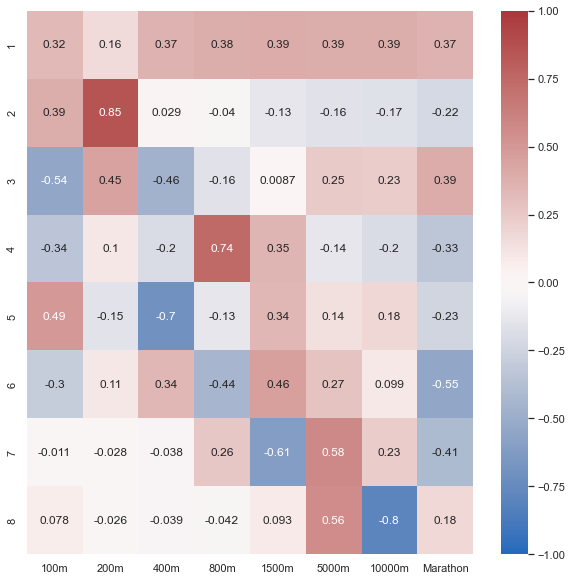

In [7]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)})
sns.color_palette("vlag", as_cmap=True)

sns.heatmap(componentes,  vmin=-1, vmax=1, annot=True, cmap='vlag');

Nota-se que as 2 primeiras componentes já explicam 87% da variabilidade. A primeira componente equilibra os pesos entre todas as variáveis com exceção da variável "200m". Já a segunda componente dá um peso menor para todas as outras e predominantemente é baseada na variável "200m". Assim, optamos por gerar uma PCA com 2 componentes:

In [8]:
pca = PCA(n_components=2).fit(X)

componentes_principais = pca.fit_transform(X)

componentes_principais = pd.DataFrame(componentes_principais, columns=["P1", "P2"])
componentes_principais.insert(loc=0, column="Country", value=registros_atléticos.Country.values)

componentes_principais.head()

,Country,P1,P2
0,Argentina,0.313192,-0.390623
1,Australia,-2.197765,-0.130328
2,Austria,-0.830780,0.116273
3,Belgium,-2.066587,0.128545
4,Bermuda,0.952213,-1.110172


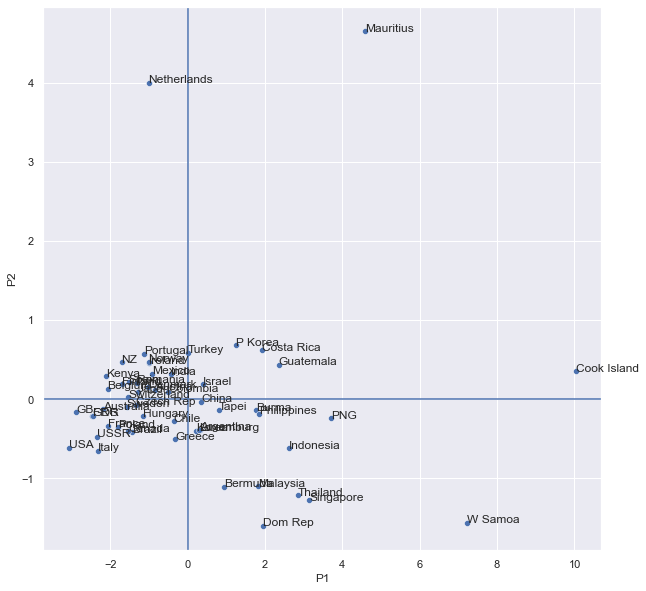

In [9]:
import matplotlib.pyplot as plt

sns.scatterplot(data=componentes_principais, x="P1", y="P2");

for componente in componentes_principais.iloc:
    plt.text(
        componente.P1,
        componente.P2,
        componente.Country
    )

plt.axvline(0);
plt.axhline(0);

### Questão 9

Aplique uma análise de componentes principais normalizada ao conjunto de dados US-HEALTH.
Este é um conjunto de dados composto por 50 medições de 13 variáveis. Ele declara por um ano (1985) o número relatado de mortes nos 50 estados dos EUA classificados de acordo com 7 categorias:

- land: área de terra
- popu.1985: população 1985
- arc: acidentes
- card: cardiovascular
- canc: câncer
- pul: pulmonar
- pneu: pneumonia
- diab: diabetes
- liv: fígado
- doc: médicos
- hosp: hospitais
- reg: número da região dos estados dos EUA
- div: número de divisão dos estados dos EUA
- Número da região dos estados dos EUA: New England 1, Mid-Atlantic 2, E.N. Central 3, W.N. Central 4, S. Atlantic 5, E.S. Central 6, W.S. Central 7, Mountain 8 e Pacific 9.
- Número de divisão dos estados dos EUA: Northeast 1, Midwest 2, South 3 e West 4.

Interprete os resultados. Seria necessário olhar para uma terceira componente principal? Você consegue ver alguma diferença entre as quatro regiões? Refaça a análise excluindo a variável “área do estado” (land).

In [10]:
divisoes = ["New England", "Mid-Atlantic", "E.N. Central", "W.N. Central", "S. Atlantic", "E.S. Central", "W.S. Central", "Mountain", "Pacific"]
regioes = ["Northeast", "Midwest", "South", "West"]
us_health = pd.read_table('./dados/US-HEALTH.txt', sep=ESPAÇO)

us_health.reg = [regioes[numero_regiao - 1] for numero_regiao in us_health.reg]
us_health['div'] = [divisoes[numero_divisao - 1] for numero_divisao in us_health['div']]

us_health.head()

,State,land,popu.1985,acc,card,canc,pul,pneu,diab,liv,doc,hosp,reg,div
0,ME,33265,1164.0,37.7,466.2,213.8,33.6,21.1,15.6,14.5,1773,47,Northeast,New England
1,NH,9279,998.0,35.9,395.9,182.2,29.6,20.1,17.6,10.4,1612,34,Northeast,New England
2,VT,9614,535.0,41.3,433.1,188.1,33.1,24.0,15.6,13.1,1154,19,Northeast,New England
3,MA,8284,5822.0,31.1,460.6,219.0,24.9,29.7,16.0,13.0,16442,177,Northeast,New England
4,RI,1212,968.0,28.6,474.1,231.5,27.4,17.7,26.2,13.4,2020,21,Northeast,New England


Padronizando os dados:

In [11]:
colunas_de_interesse = us_health.columns[np.arange(1, 12)]
X = us_health.loc[:, colunas_de_interesse]

scaler = StandardScaler()
us_health_padronizado = pd.DataFrame(scaler.fit_transform(X), columns=colunas_de_interesse)

us_health_padronizado.head()

,land,popu.1985,acc,card,canc,pul,pneu,diab,liv,doc,hosp
0,-0.531332,-0.710753,-0.608130,0.811420,1.081629,1.282720,0.015126,0.210412,1.454308,-0.628704,-0.773637
1,-1.038072,-0.743724,-0.773683,-0.031536,0.115834,0.561483,-0.228843,0.761230,-0.054463,-0.643291,-0.884865
2,-1.030994,-0.835685,-0.277025,0.414523,0.296157,1.192566,0.722638,0.210412,0.939118,-0.684789,-1.013206
3,-1.059093,0.214418,-1.215156,0.744272,1.240557,-0.285971,2.113264,0.320576,0.902319,0.700398,0.338648
4,-1.208499,-0.749682,-1.445091,0.906148,1.622596,0.164803,-0.814370,3.129747,1.049516,-0.606324,-0.996094


Obtendo a PCA:

In [12]:
X = us_health_padronizado.loc[:, colunas_de_interesse]
n_de_colunas = len(colunas_de_interesse)
pca = PCA(n_components=n_de_colunas).fit(X)

Verificando a explicabilidade: 

In [13]:
pca_explicabilidade = pd.DataFrame({
    "componente": np.arange(1,n_de_colunas + 1),
    "var_explicada": pca.explained_variance_ratio_,
    "var_explicada_acumulada": np.cumsum(pca.explained_variance_ratio_)
})

pca_explicabilidade

,componente,var_explicada,var_explicada_acumulada
0,1,0.358921,0.358921
1,2,0.265497,0.624418
2,3,0.133427,0.757845
3,4,0.094401,0.852246
4,5,0.059963,0.912210
5,6,0.042515,0.954725
6,7,0.022826,0.977551
7,8,0.014033,0.991583
8,9,0.004301,0.995884
9,10,0.003509,0.999393


Verificando a combinação das variáveis na formação de cada componente:

In [14]:
componentes = pd.DataFrame(pca.components_,columns=colunas_de_interesse,index = [x for x in np.arange(1,n_de_colunas + 1)])

componentes

,land,popu.1985,acc,card,canc,pul,pneu,diab,liv,doc,hosp
1,-0.007811,-0.362711,0.331463,-0.382785,-0.408834,-0.160433,-0.176639,-0.263192,-0.268287,-0.371483,-0.329628
2,0.372872,0.393703,0.153520,-0.297368,-0.296345,-0.244367,-0.164728,-0.337643,0.114145,0.360277,0.403071
3,0.484111,-0.075173,0.237525,0.155333,-0.021816,0.475690,0.580023,-0.261153,-0.176697,-0.101358,0.080990
4,-0.000137,-0.044723,0.308089,-0.153264,0.046060,0.504549,-0.271661,-0.025932,0.718784,-0.005559,-0.178177
5,0.529544,-0.015030,0.077068,0.043783,0.055748,0.152165,-0.503449,0.543661,-0.266923,-0.196710,0.162076
6,-0.171088,0.048110,0.806337,0.349559,0.243097,-0.335578,0.033761,0.090569,-0.001754,0.005821,0.122292
7,0.304358,-0.159497,0.018805,-0.247144,-0.150080,-0.378198,0.467920,0.522126,0.355471,0.061794,-0.182184
8,0.404325,-0.191033,-0.221720,0.228714,0.398689,-0.391045,-0.139114,-0.404504,0.296693,-0.335071,-0.058428
9,0.181870,0.002797,-0.023820,0.600452,-0.426448,-0.034476,-0.169539,-0.037202,0.004417,0.382109,-0.496593
10,0.162973,0.009750,0.093485,-0.343859,0.562889,0.012177,-0.041352,-0.072789,-0.285078,0.482308,-0.456591


Usando um gráfico de calor para visualizar o peso de cada variável na formação das componentes:

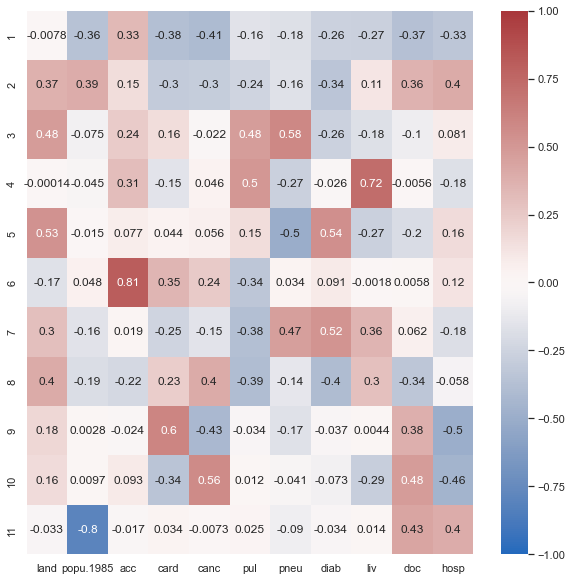

In [15]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(componentes,  vmin=-1, vmax=1, annot=True, cmap='vlag');

Já neste dataset, notamos que somente após a terceira componente vemos pesos próximos de 0 para muitas variáveis. Além disto, com 3 componentes temos 75% da variabilidade explicada. Assim, optamos por gerar uma PCA com 3 componentes:

In [16]:
pca = PCA(n_components=3).fit(X)

componentes_principais = pca.fit_transform(X)

componentes_principais = pd.DataFrame(componentes_principais, columns=["P1", "P2", "P3"])
componentes_principais.insert(loc=0, column="State", value=us_health.State.values)

componentes_principais.head()

,State,P1,P2,P3
0,ME,-0.857879,-1.892457,0.062301
1,NH,0.281384,-1.774777,-0.699107
2,VT,-0.098347,-1.996418,0.308733
3,MA,-2.290029,-0.980634,0.074068
4,RI,-1.642177,-3.180929,-2.182545


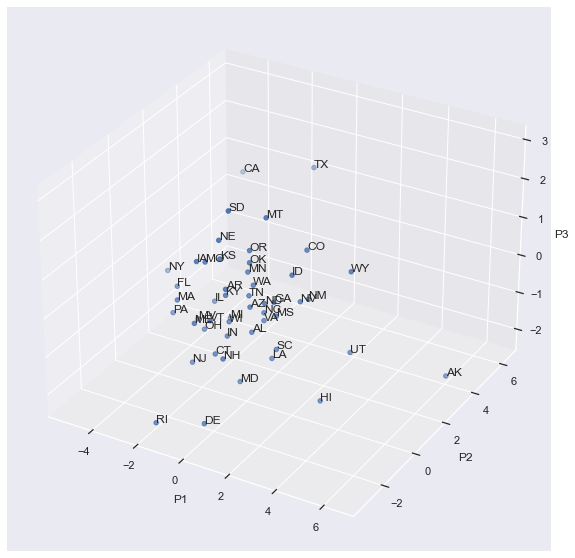

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = componentes_principais.P1
y = componentes_principais.P2
z = componentes_principais.P3

ax.set_xlabel("P1")
ax.set_ylabel("P2")
ax.set_zlabel("P3")

ax.scatter(x, y, z)

for componente in componentes_principais.iloc:
    ax.text(
        componente.P1,
        componente.P2,
        componente.P3,
        componente.State
    )

plt.show()

Refazendo a análise sem a variável land, temos:

In [18]:
colunas_de_interesse = us_health.columns[np.arange(2, 12)]
X = us_health.loc[:, colunas_de_interesse]

scaler = StandardScaler()
us_health_padronizado = pd.DataFrame(scaler.fit_transform(X), columns=colunas_de_interesse)

X = us_health_padronizado.loc[:, colunas_de_interesse]
n_de_colunas = len(colunas_de_interesse)
pca = PCA(n_components=n_de_colunas).fit(X)

pca_explicabilidade = pd.DataFrame({
    "componente": np.arange(1,n_de_colunas + 1),
    "var_explicada": pca.explained_variance_ratio_,
    "var_explicada_acumulada": np.cumsum(pca.explained_variance_ratio_)
})

pca_explicabilidade

,componente,var_explicada,var_explicada_acumulada
0,1,0.394798,0.394798
1,2,0.263367,0.658165
2,3,0.117952,0.776117
3,4,0.103841,0.879958
4,5,0.049622,0.929581
5,6,0.038096,0.967676
6,7,0.021064,0.988741
7,8,0.006391,0.995132
8,9,0.004172,0.999303
9,10,0.000697,1.000000


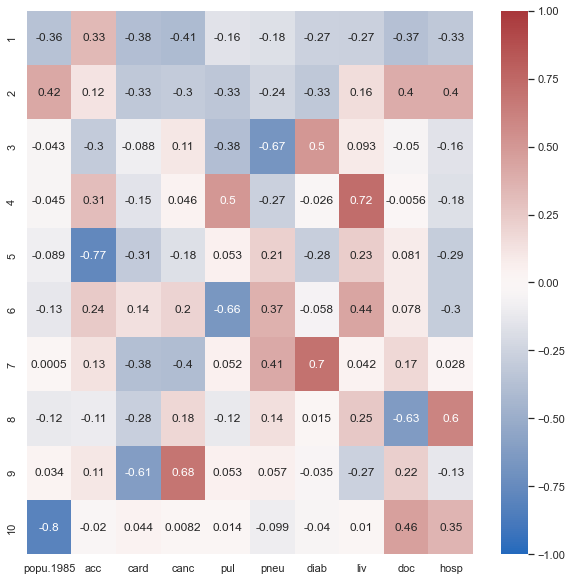

In [19]:
componentes = pd.DataFrame(pca.components_,columns=colunas_de_interesse,index = [x for x in np.arange(1,n_de_colunas + 1)])

sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(componentes,  vmin=-1, vmax=1, annot=True, cmap='vlag');

Utilizando 3 compontes principais, temos:

In [20]:
pca = PCA(n_components=3).fit(X)

componentes_principais = pca.fit_transform(X)

componentes_principais = pd.DataFrame(componentes_principais, columns=["P1", "P2", "P3"])
componentes_principais.insert(loc=0, column="State", value=us_health.State.values)

componentes_principais.head()

,State,P1,P2,P3
0,ME,-0.870189,-1.787398,0.146199
1,NH,0.266286,-1.425790,0.765802
2,VT,-0.113609,-1.774264,-0.444277
3,MA,-2.300963,-0.635615,-0.737941
4,RI,-1.666706,-2.624261,2.898004


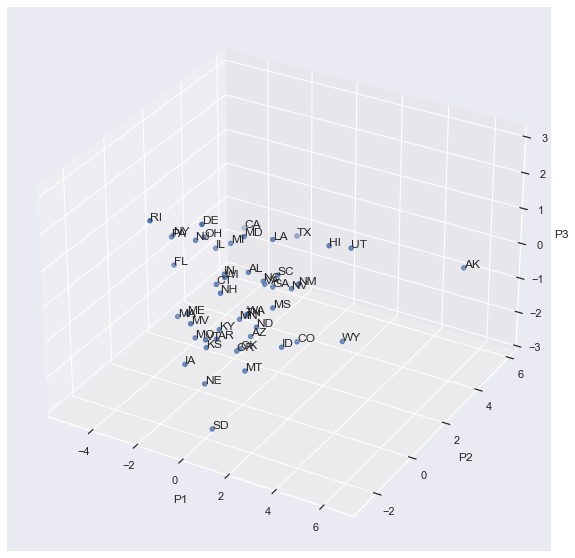

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = componentes_principais.P1
y = componentes_principais.P2
z = componentes_principais.P3

ax.set_xlabel("P1")
ax.set_ylabel("P2")
ax.set_zlabel("P3")

ax.scatter(x, y, z)

for componente in componentes_principais.iloc:
    ax.text(
        componente.P1,
        componente.P2,
        componente.P3,
        componente.State
    )

plt.show()

### Questão 10 (usando Análise de Cluster)

Aplique uma análise de componentes principais normalizada ao conjunto de dados GEOPOL.
Este conjunto de dados contém uma comparação de 41 países de acordo com 10 parâmetros políticos e econômicos diferentes:

- popu: população
- giph: produto interno bruto por habitante
- ripo: taxa de crescimento da população
- rupo: taxa de população urbana
- rlpo: taxa de analfabetismo na população
- rspo: taxa de alunos na população
- eltp: tempo de vida esperado das pessoas
- rnnr: taxa de necessidades nutricionais realizadas
- nunh: número de jornais e revistas por 1000 habitantes
- nuth: número de televisores por 1000 habitantes

Siglas: AFS África do Sul, DAN Dinamarca, MAR Marrocos, ALG Argélia, EGY Egito, MEX México, BRD Alemanha, ESP Espanha, NOR Noruega, GBR Grã-Bretanha, FRA França, PER Peru, ARS Arábia Saudita, GAB Gabão, POL Polônia, ARG Argentina, GRE Grécia, POR Portugal, AUS Austrália, HOK Hong Kong, SUE Suécia, AUT Áustria, HON Hungria, SUI Suíça, BEL Bélgica, IND Índia, THA Tailândia, CAM Camarões, IDO Indonésia, URS URSS, CAN Canadá, ISR Israel, EUA EUA, CHL Chile, ITA Itália, VEN Venezuela, CHN China, JAP Japão, YOU Iugoslávia, CUB Cuba, KEN Quênia,

In [22]:
geopol = pd.read_table('./dados/GEOPOL.txt', sep=ESPAÇO)

geopol.head()

,Sigla,popu,giph,ripo,rupo,rlpo,rspo,eltp,rnnr,nunh,nuth
0,AFS,37.00,2492,2.00,58.9,44.0,1.08,60,120,48,98
1,ALG,24.60,1960,3.00,44.7,50.4,0.73,64,112,21,71
2,BRD,62.00,19610,0.40,86.4,2.0,2.72,72,145,585,759
3,GBR,57.02,14575,0.04,92.5,2.2,1.90,75,128,421,435
4,ARS,14.40,5980,2.70,77.3,48.9,0.91,63,125,34,269


Ajustando o cluster, que por padrão usa distância euclidiana e ligação ward, temos:

In [25]:
from sklearn.cluster import AgglomerativeClustering

modelo = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
cluster = modelo.fit(geopol.loc[:, geopol.columns != "Sigla"])

Plotando o dendrograma:

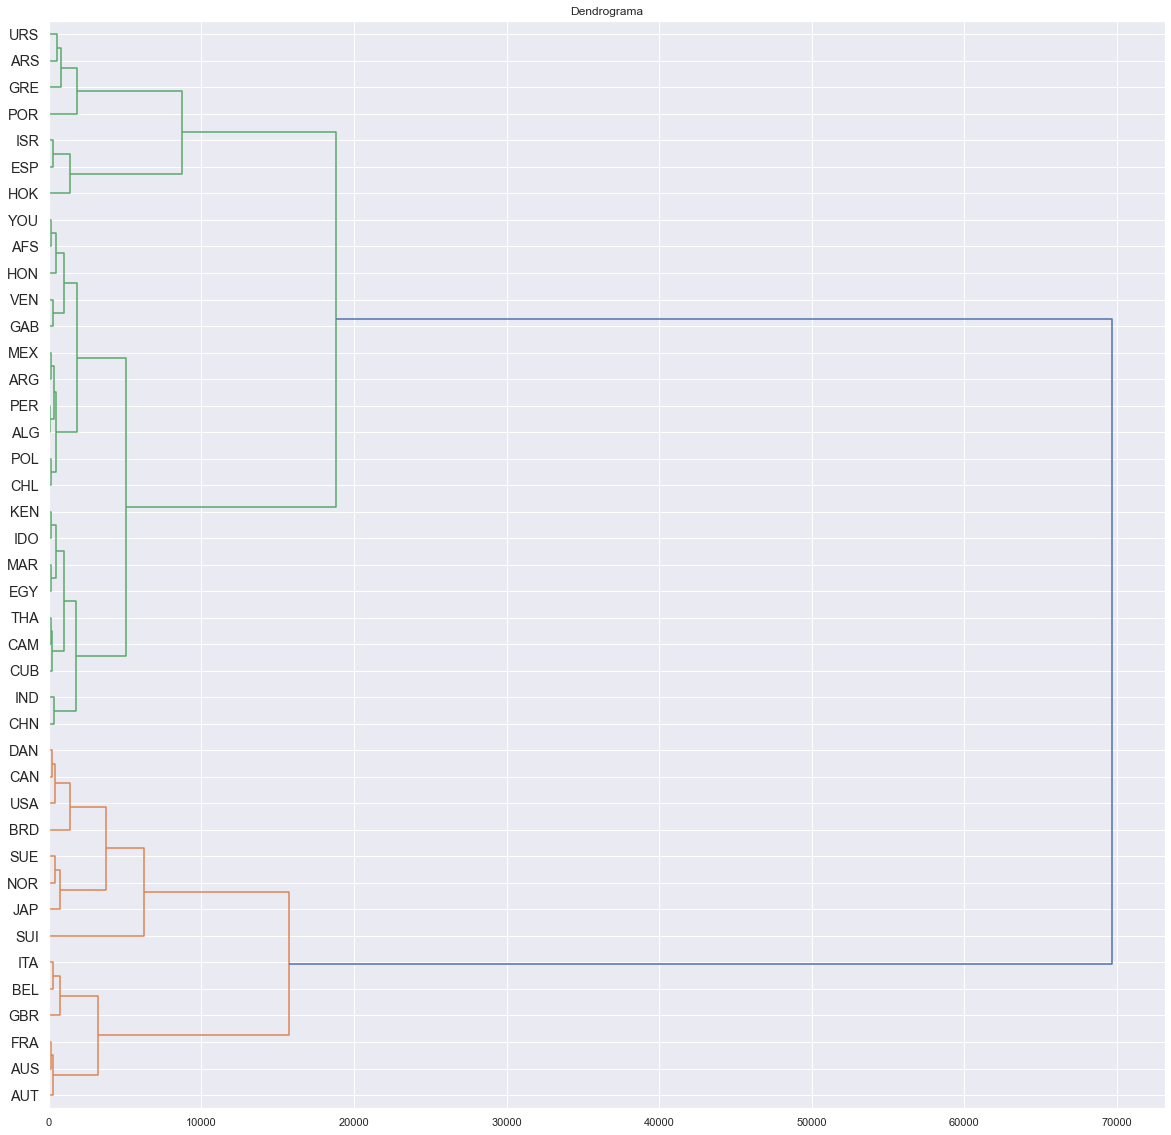

In [69]:
from utils import plot_dendrogram

plt.title("Dendrograma")
plot_dendrogram(cluster, truncate_mode="level", orientation = 'right')

# arruma legendas
eixo_y = plt.gca().get_yaxis()
legendas = []
for label in eixo_y.get_ticklabels():
    legenda: str = label.get_text()
    if not legenda.count('('):
        label.set_text(geopol.iloc[int(legenda)].Sigla)
    legendas.append(label)
eixo_y.set_ticklabels(legendas);
eixo_y.set_tick_params(labelsize='large')

#aumenta figura
fig = plt.gcf()
fig.set_size_inches(20, 20)